In [1]:
from BeeWorldGame.bee_world.run_game import BeeWorldGame
import argparse    

In [2]:
import sys; sys.argv=['']; del sys
parser = argparse.ArgumentParser(
    description='Arguments for the BeeWorld game'
)

# Agent arguments
parser.add_argument('--step_interval', type=float, default=0.1, 
                    help='The interval of the agent moves in the '
                    'environment')
parser.add_argument('--initial_location', type=float, default=0.5, 
                    help='The relative starting position of the agent in '
                    'the environment')
parser.add_argument('--random_state', default=2022, help='The random state'
                    ' value')
parser.add_argument('--n_trials', type=int, default=100, help='The number '
                    'of simulated steps to evaluate')
# Environment arguments
parser.add_argument('--steps', type=int, default=2000, help='The time over'
                    ' which the environment evolves')
parser.add_argument('--w', type=float, default=0.1, help='Speed at which'
                    ' the environment evolves over time')
parser.add_argument('--circle_length', type=int, default=1, 
                    help='The length of a circle')
parser.add_argument('--c', type=float, default=0.01, help='The grid of the'
                    ' game environment')
# Game arguments
parser.add_argument('--environment', type=str, default='BeeWorldEnv',
                    help='The name of the environment')
parser.add_argument('--agent', type=str, default='BeeAgent', help='The '
                    'name of the agent')
parser.add_argument('--function',type=str, default='ESN', help=' name of '
                    'the value function approximator')
parser.add_argument('--n', type=int, default=2000, help='The number of '
                    'time steps in the game')
# function approximator arguments
parser.add_argument('--n_inputs', default=2, help='The dimensionality of '
                    'the input')
parser.add_argument('--n_outputs', default=1, help='The dimensionality of '
                    'the output')
parser.add_argument('--n_reservoir', default=300, help='The size of the '
                    'reservoir')
parser.add_argument('--activation', default='ReLU', help='The activation '
                    'function')
parser.add_argument('--two_norm', type=float, default=1, help='The 2-norm '
                    'of the recurrent weight matrix')
parser.add_argument('--sparsity', type=float, default=0.0, 
                    help='The proportion of recurrent weights set to zero')
parser.add_argument('--L2', type=float, default=10**-9, 
                    help='The regularisation parameter of the ridge '
                    'regression')
parser.add_argument('--gamma', type=float, default=0.5, help='The discount'
                    ' factor of the value function')
parser.add_argument('--sampling_bounds', type=float, default=0.05, 
                    help='The uniform bounds of the interval from which to'
                    ' sample the random matrices') 

config = parser.parse_args()

In [3]:
# initialising the game
BeeGame = BeeWorldGame(config)

In [4]:
# run the game with the uniform policy pi_0
BeeGame.run_game(mode='init')

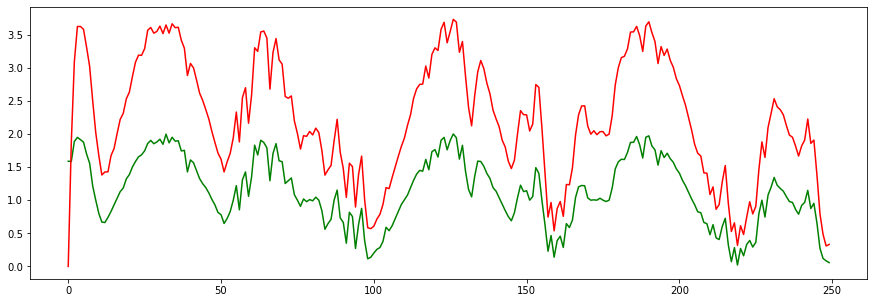

In [5]:
# plot true and estimated nectar function
BeeGame.plot_rewards()

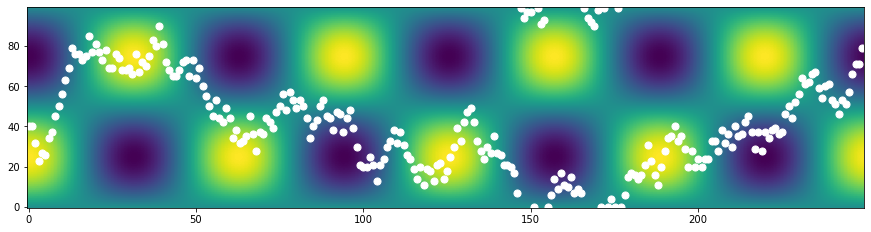

In [6]:
# plot the Bee trajectory
BeeGame.plot_game()

In [7]:
print(f'Average nectar unit collected by the Bee \n'
      f'per time unit under the strategy pi_0: {BeeGame.z[:,0].mean()}')

Average nectar unit collected by the Bee 
per time unit under the strategy pi_0: 1.0304855627550695


In [8]:
# estimate the imporoved policy pi_1 and run the game
BeeGame.run_game(mode='train')

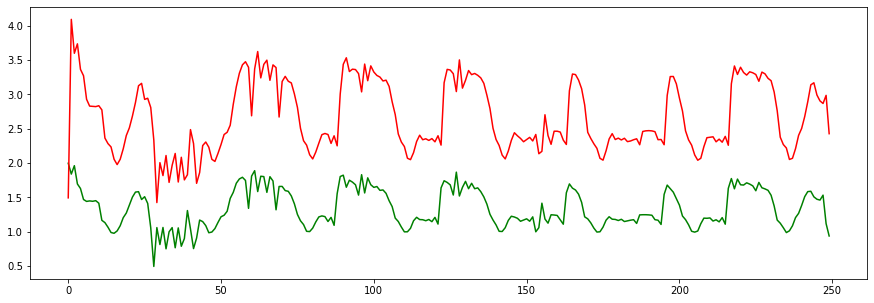

In [9]:
# plot true and estimated nectar function
BeeGame.plot_rewards()

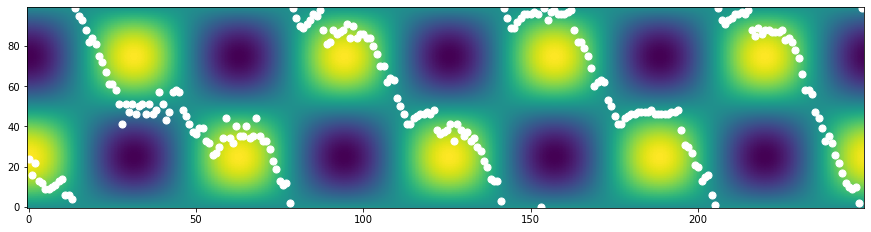

In [10]:
# plot the Bee trajectory
BeeGame.plot_game()

In [11]:
print(f'Average nectar unit collected by the Bee \n'
      f'per time unit under the improved strategy pi_1: {BeeGame.z[:,0].mean()}')

Average nectar unit collected by the Bee 
per time unit under the improved strategy pi_1: 1.3778125236324759


In [12]:
#  We now consider an analytic solution for the Bee World game
BeeGame.run_game(mode='solution')

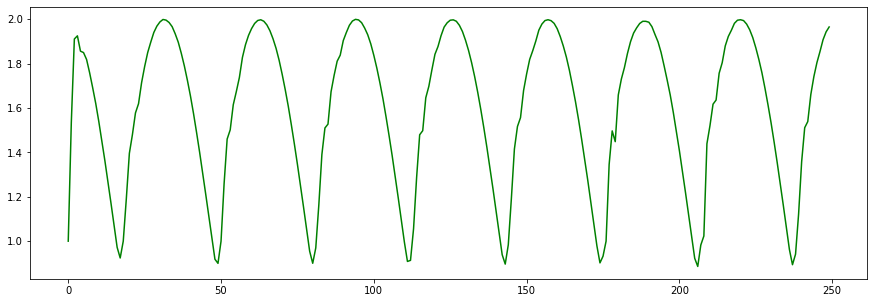

In [13]:
# Plot the collected amount of nectar
BeeGame.plot_rewards(solution=True)

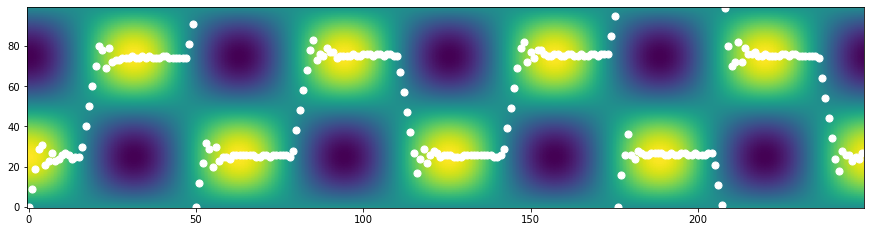

In [14]:
# plot the trajectory of the Bee obtained using the analytic solution
BeeGame.plot_game()

In [15]:
print(f'Average nectar unit collected by the Bee \n'
      f'per time unit using the numerical solution to the \n'
      f'dynamical system ODEs: {BeeGame.z[:,0].mean()}')

Average nectar unit collected by the Bee 
per time unit using the numerical solution to the 
dynamical system ODEs: 1.5988687142122147
